Epoch 1/40


C:\Users\Giovanni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 2.2310 - loss: 5.0237 - val_RootMeanSquaredError: 2.0256 - val_loss: 4.1030
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.0824 - loss: 1.1797 - val_RootMeanSquaredError: 1.7181 - val_loss: 2.9518
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8206 - loss: 0.6736 - val_RootMeanSquaredError: 1.4090 - val_loss: 1.9854
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7775 - loss: 0.6062 - val_RootMeanSquaredError: 1.2101 - val_loss: 1.4643
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7045 - loss: 0.4965 - val_RootMeanSquaredError: 1.0559 - val_loss: 1.1150
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6841 - loss: 0.4682 - val_RootMeanSquaredError: 0.9401 - val_loss: 0.8837
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6676 - loss: 0.4459 -

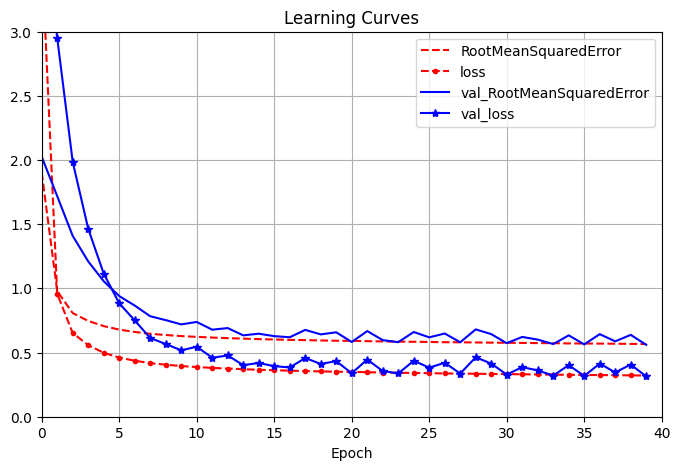

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5721 - loss: 0.3274 - val_RootMeanSquaredError: 0.5612 - val_loss: 0.3150
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5644 - loss: 0.3188 - val_RootMeanSquaredError: 0.5615 - val_loss: 0.3153
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5680 - loss: 0.3228 - val_RootMeanSquaredError: 0.6153 - val_loss: 0.3786
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5633 - loss: 0.3176 - val_RootMeanSquaredError: 0.5901 - val_loss: 0.3482
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5798 - loss: 0.3363 - val_RootMeanSquaredError: 0.5781 - val_loss: 0.3342
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5664 - loss: 0.3208 - val_RootMeanSquaredError: 0.5823 - val_loss: 0.3391
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5551 - los

In [ ]:
from tensorflow import keras
from keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

#Caricamento dataset
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

#Normalization: adattamento PRIMA del grafo
normalization_layer = layers.Normalization()
normalization_layer.adapt(X_train)

#Layer e struttura manuale
hidden1 = layers.Dense(30, activation="relu")
hidden2 = layers.Dense(30, activation="relu")
concat_layer = layers.Concatenate()
outputlayer = layers.Dense(1)

#Input simbolico
input = layers.Input(shape=X_train.shape[1:])  # es. 8 feature

#Costruzione del grafo computazionale
normalized = normalization_layer(input)       # normalizzazione (dopo adapt)
h1 = hidden1(normalized)                       # primo hidden layer
h2 = hidden2(h1)                               # secondo hidden layer
concat = concat_layer([normalized, h2])        # percorso wide + deep
output = outputlayer(concat)                  # output finale

#Costruzione modello
model = keras.Model(inputs=[input], outputs=[output])

#Compilazione
model.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=2e-4),  # learning rate più basso per evitare overfitting
    metrics=["RootMeanSquaredError"]
)

#Addestramento
history1 = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_valid, y_valid)
)

#Plot
pd.DataFrame(history1.history).plot(
    figsize=(8, 5), xlim=[0, 40], ylim=[0, 3], grid=True,
    xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.title("Learning Curves")
plt.show()

from pathlib import Path
from time import strftime
import tensorflow as tf

# Funzione per creare una directory unica per ogni esecuzione
def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

# Callback
tensorboard_cb = tf.keras.callbacks.TensorBoard(
log_dir=run_logdir,
profile_batch=(100, 200) # opzionale: profila solo i batch da 100 a 200
)

# Addestramento del modello
history = model.fit(
X_train, y_train,
epochs=30,
validation_data=(X_valid, y_valid),
callbacks=[tensorboard_cb]
)

In [3]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs

Reusing TensorBoard on port 6006 (pid 18640), started 0:04:28 ago. (Use '!kill 18640' to kill it.)